#Setup e imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

sns.set_theme()

#Código base (Siraj Raval)

In [ ]:
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = float(points[i, 0])
        y = float(points[i, 1])
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return new_b, new_m

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return b, m

def run(filepath, learning_rate=0.0001, num_iterations=1000):
    points = np.genfromtxt(filepath, delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    print ("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    b, m = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations w0 = {1}, w1 = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    

In [ ]:
model_data_path = "/content/drive/MyDrive/ML/regressaoLinearSimples/linear_regression_data.csv"
run(filepath=model_data_path)

Starting gradient descent at w0 = 0, w1 = 0, error = 5565.107834483211
Running...
After 1000 iterations w0 = 0.08893651993741346, w1 = 1.4777440851894448, error = 112.61481011613473


In [ ]:
income_data_path = "/content/drive/MyDrive/ML/regressaoLinearSimples/income.csv"
run(filepath=income_data_path)

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
After 1000 iterations w0 = -0.18234255376510086, w1 = 3.262182267596014, error = 103.39842291729676


#Questão 1


Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

Gere um plot mostrando o RSS (eixo y) por iteração (eixo x).

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
After 1000 iterations w0 = -0.18234255376510086, w1 = 3.262182267596014, error = 103.39842291729676


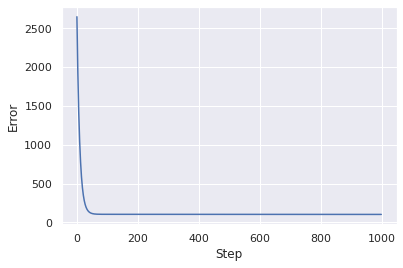

In [ ]:
def q1_gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    error_steps = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        error_steps.append(compute_error_for_line_given_points(b, m, points))
    return b, m, error_steps

def plot_error(error_steps):
  data = pd.DataFrame()
  data['Error'] = error_steps
  data['Step'] = [x for x in range(len(error_steps))]
  
  sns.lineplot(data=data, x='Step', y='Error')    

def q1_run(filepath, learning_rate=0.0001, num_iterations=1000):
    points = np.genfromtxt(filepath, delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    print ("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    b, m, error_steps = q1_gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations w0 = {1}, w1 = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    plot_error(error_steps)

q1_run(income_data_path)


#Questão 2

Teste valores pequenos, médios e grandes de alpha (learning rate).

O que acontece com o RSS durante as iterações em cada caso? Por que?

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
After 1000 iterations w0 = 0.009753606805033586, w1 = 0.1702045664053923, error = 2655.9245544507507
------------------------------------------------------------------------------------------------------------------------
Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
After 1000 iterations w0 = 0.07666927191769354, w1 = 1.3515051987364082, error = 1070.4308756792848
------------------------------------------------------------------------------------------------------------------------
Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
After 1000 iterations w0 = 0.15431825293573612, w1 = 3.2276061763518364, error = 104.7255043116133
------------------------------------------------------------------------------------------------------------------------
Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
After

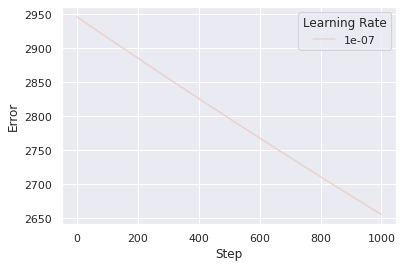

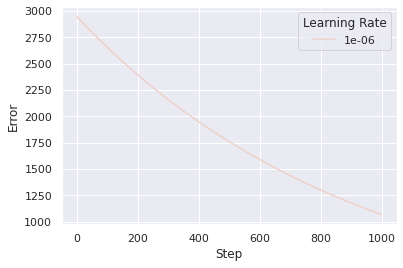

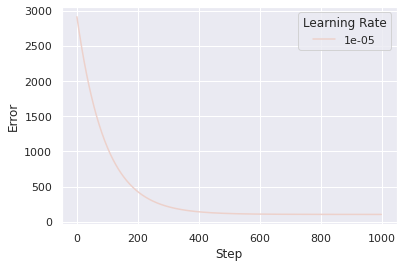

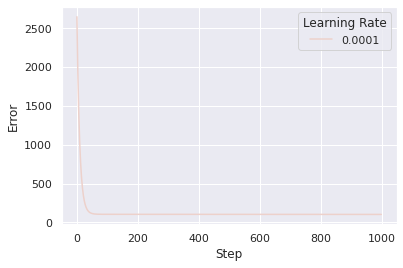

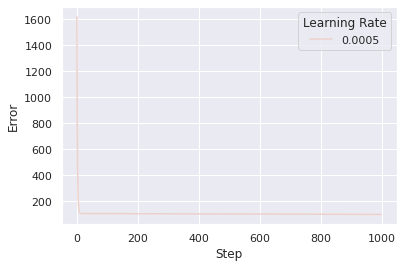

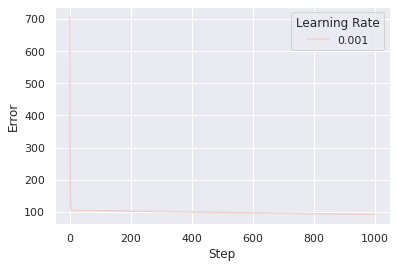

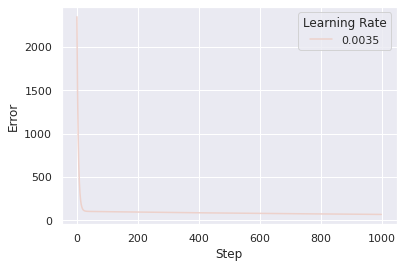

In [ ]:
def q2_run(filepath, learning_rate=0.0001, num_iterations=1000):
    points = np.genfromtxt(filepath, delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    print ("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    b, m, error_steps = q1_gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations w0 = {1}, w1 = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return error_steps


learning_rates = [1e-7, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 0.35e-2]
df = pd.DataFrame()

for lr in learning_rates:
  error_steps = q2_run(income_data_path, learning_rate=lr,num_iterations=1000)
  steps = [x for x in range(len(error_steps))]

  temp_df = pd.DataFrame({
      'Error': error_steps,
      'Step': steps,
      'Learning Rate': lr})

  df = pd.concat([df, temp_df])
  print('-' * 120)

for lr in learning_rates:
  plt.figure()
  sns.lineplot(data=df.loc[df['Learning Rate'] == lr],
               x='Step', y='Error', hue='Learning Rate')


  

A variação do parâmetro *learning rate* (alpha) tem impacto direto no decaimento do RSS a cada iteração.

Valores maiores de ***alpha*** provocam decaimento mais acentuado do RSS, visto que permite variação mais brusca dos parâmetros **w0** e **w1** da curva a cada iteração.

#Questão 3


Teste valores diferentes do número de iterações e alpha até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente.

Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

In [ ]:
def q3_run(filepath, learning_rate=0.0001, num_iterations=1000):
    points = np.genfromtxt(filepath, delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess

    w0, w1, error_steps = q1_gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error_last_iter = compute_error_for_line_given_points(w0, w1, points)

    return w0, w1, error_last_iter


learning_rates = [1e-7, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3]
iterations = [1000, 10000, 100000]
df = pd.DataFrame(columns=['Learning Rate', 'Iterations', 'w0', 'w1', 'Error'])

for lr in learning_rates:
  for n_iterations in iterations:
    w0, w1, error = q3_run(income_data_path, learning_rate=lr, num_iterations=n_iterations)
    df.loc[len(df)] = [lr, n_iterations, w0, w1, error]

df


,Learning Rate,Iterations,w0,w1,Error
0,1.000000e-07,1000.0,0.009754,0.170205,2655.924554
1,1.000000e-07,10000.0,0.076655,1.351258,1070.684020
2,1.000000e-07,100000.0,0.154306,3.227395,104.727171
3,1.000000e-06,1000.0,0.076669,1.351505,1070.430876
4,1.000000e-06,10000.0,0.154307,3.227414,104.727018
5,1.000000e-06,100000.0,-0.182341,3.262182,103.398430
6,1.000000e-05,1000.0,0.154318,3.227606,104.725504
7,1.000000e-05,10000.0,-0.182341,3.262182,103.398429
8,1.000000e-05,100000.0,-3.403315,3.453920,91.823109
9,1.000000e-04,1000.0,-0.182343,3.262182,103.398423


Os parâmetros que aproximam **w0** e **w1** dos valores propostos são:

**Learning rate = 0.005**

**Iterações = 100000**

#Questão 4

O algoritmo do vídeo usa o número de iterações como critério de parada.

Mude o algoritmo para considerar um critério de tolerância que é comparado à norma do gradiente (como no algoritmo dos slides apresentados em sala). 

In [ ]:
def q4_step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = float(points[i, 0])
        y = float(points[i, 1])
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))

    gradient_norma = np.linalg.norm(b_gradient - m_gradient)
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)

    return new_b, new_m, gradient_norma

def q4_gradient_descent_runner(points, starting_b, starting_m, learning_rate, tolerance):
    b = starting_b
    m = starting_m
    error_steps = []

    gradient_norma = tolerance + 1

    while gradient_norma > tolerance:
        b, m, gradient_norma = q4_step_gradient(b, m, np.array(points), learning_rate)
        error_steps.append(compute_error_for_line_given_points(b, m, points))

    return b, m, error_steps

def q4_run(filepath, learning_rate=0.0001, tolerance=0.001):
    points = np.genfromtxt(filepath, delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    w0, w1, error_steps = q4_gradient_descent_runner(points, initial_b, initial_m, learning_rate, tolerance)
    error_last_iter = compute_error_for_line_given_points(w0, w1, points)
    
    return w0, w1, error_last_iter

w0, w1, error_last_iter = q4_run(income_data_path)
print(f"w0 = {w0}, w1 = {w1}, error = {error_last_iter}")


w0 = -39.436332895817216, w1 = 5.598892131571867, error = 29.82882089865924


#Questão 5

Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima.

Que valor foi esse?


In [ ]:
learning_rates = [1e-4, 5e-4, 1e-3]
tolerance_values = [0.1, 0.01, 0.001]
df = pd.DataFrame(columns=['Learning Rate', 'Tolerance', 'w0', 'w1', 'Error'])

for lr in learning_rates:
  for tol in tolerance_values:
    w0, w1, error = q4_run(income_data_path, learning_rate=lr, tolerance=tol)
    df.loc[len(df)] = [lr, tol, w0, w1, error]

df

,Learning Rate,Tolerance,w0,w1,Error
0,0.0001,0.100,-38.453882,5.540409,29.875812
1,0.0001,0.010,-39.347020,5.593575,29.829286
2,0.0001,0.001,-39.436333,5.598892,29.828821
3,0.0005,0.100,-38.453924,5.540411,29.875808
4,0.0005,0.010,-39.347025,5.593576,29.829286
5,0.0005,0.001,-39.436334,5.598892,29.828821
6,0.0010,0.100,-38.454011,5.540416,29.875800
7,0.0010,0.010,-39.347035,5.593576,29.829286
8,0.0010,0.001,-39.436334,5.598892,29.828821


Os parâmetros que aproximam **w0** e **w1** dos valores propostos são:

**Learning rate = 0.0001**

**Tolerância = 0.01**

#Questão 6

Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides).

Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

In [ ]:
def q5_compute_normal_equations(x, y):
	x_mean = np.mean(x)
	y_mean = np.mean(y)
 
	w1 = sum((x - x_mean)*(y - y_mean)) / sum((x - x_mean)**2)
	w0 = y_mean - (w1 * x_mean)
 
	return w0, w1


def q6_run(filepath, learning_rate=0.0001, num_iterations=1000):
    points = np.genfromtxt(filepath, delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    b, m = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

gradient_descent_setup = '''
import numpy as np
import pandas as pd

from __main__ import q6_run
from __main__ import income_data_path
'''

gradient_descent_statement = '''q6_run(income_data_path)'''

normal_equations_setup = '''
import numpy as np

from __main__ import q5_compute_normal_equations
from __main__ import income_data_path

source = np.genfromtxt(income_data_path, delimiter=",")
x, y = zip(*source)
'''

normal_equations_statement = '''q5_compute_normal_equations(x,y)'''

iterations = 1000

gradient_descent_time = timeit.timeit(setup=gradient_descent_setup,
                                      stmt=gradient_descent_statement,
                                      number=iterations) / iterations

normal_equations_time = timeit.timeit(setup=normal_equations_setup,
                                      stmt=normal_equations_statement,
                                      number=iterations) / iterations

source = np.genfromtxt(income_data_path, delimiter=",")
x, y = zip(*source)  
w0, w1 = q5_compute_normal_equations(x,y)                                    
print(f'Normal equations values: w0 = {w0}, w1 = {w1}\n')

print(f'Gradient Descent mean time: {gradient_descent_time:.3f} seconds')
print(f'Normal equations mean time: {normal_equations_time:.5f} seconds')



Normal equations values: w0 = -39.446256679096194, w1 = 5.59948287411992

Gradient Descent mean time: 0.034 seconds
Normal equations mean time: 0.00005 seconds


Nota-se que as equações normais apresentam tempo de execução expressivamente menor que o Gradiente Descendente.

Obtendo tempo médio de execução de **0.00005 segundos** para as equações normais e **0.034 segundos** para o Gradiente Descendente.
